In [1]:
import pandas as pd
ezh_pk='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE76nnn/GSE76626/suppl/GSE76626_ChIP-Seq_RPM.txt.gz' ## hg38
data='/labs/mpsnyder/moqri/data/index/'

In [2]:
df=pd.read_table('ezh2_19',header=None)
df['ind']=df[0].astype(str)+'_'+df[1].astype(str)
ll=df.ind.values

In [3]:
dfs=[]
for i in range(1,19):
    dfs.append(pd.read_table(data+'rrbs/methylcall.CpG.OD'+str(i)+'.mincov0.txt',index_col=0,nrows=100000))
    print(i,end=',')

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,

In [4]:
inds=[]
for i in range(18):
    df=dfs[i]
    df['g']=df.chr.str[3:]+'_'+df.base.astype(str)
    df=df[df.g.isin(ll)]
    inds.append(df.index)
    dfs[i]=df

In [5]:
inds=set().union(*inds)
len(inds)

460

In [6]:
for i in range(18):
    df=dfs[i]
    df['m_'+str(i)]=df.freqC*df.coverage/100
    df['u_'+str(i)]=df.freqT*df.coverage/100
    df=df.drop(['chr','base','strand','coverage','freqC','freqT'],1)
    dfs[i]=df

<ipython-input-6-ce22746134f6>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['chr','base','strand','coverage','freqC','freqT'],1)


In [30]:
dg=pd.DataFrame()
dg.index=inds

In [31]:
for i in range(18):
    df=dfs[i]
    dg=dg.merge(dfs[i].drop('g',1),left_index=True,right_index=True,how='left')
    dg['b_'+str(i)]=df['m_'+str(i)]/df['u_'+str(i)]
dg.shape

<ipython-input-31-2d46e162da84>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dg=dg.merge(dfs[i].drop('g',1),left_index=True,right_index=True,how='left')


(460, 54)

In [32]:
dg=dg[['b_'+str(i) for i in range(18)]]

In [33]:
dg['chr']=dg.index.str.split('.').str[0]

In [34]:
dg['base']=dg.index.str.split('.').str[1]

In [35]:
dg['base2']=dg['base']

In [25]:
dg['strand']='+'

In [37]:
dg=dg[list(dg.columns[-3:])]#+(list(dg.columns[:-4]))]

In [38]:
dg.to_csv(data+'hg19_mono.txt',index=None,sep='\t')

In [39]:
!CrossMap.py bed hg19ToHg38.over.chain.gz {data}hg19_mono.txt {data}hg38_mono.txt

2021-11-19 06:26:29 [INFO]  Read the chain file "hg19ToHg38.over.chain.gz" 
Start coordinate is not an integer. skip chr	base	base2


In [34]:
pd.read_table(data+'hg38_mono.txt',header=None)

ParserError: Error tokenizing data. C error: Expected 4 fields in line 4, saw 5


In [90]:
df38=pd.read_table(data+'hg38_mono.txt',header=None,names=['chr','b1','b2','by','bo'])
df38.shape

(12456, 5)

In [91]:
df38.index=df38.chr.str.strip('chr')+'_'+df38.b1.astype(str)

In [92]:
df=pd.read_csv('ezs.csv',index_col=0)
df.shape

(210130, 10)

In [93]:
df38=df38.merge(df[['d','dq']],left_index=True,right_index=True)
df38.shape

(12449, 7)

In [95]:
df38['dq']=pd.qcut(df38.d,5)

<AxesSubplot:xlabel='dq'>

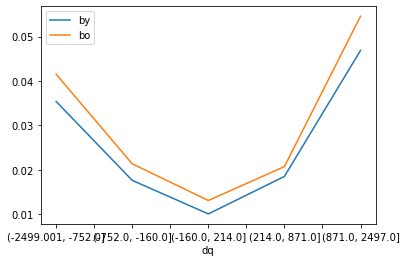

In [96]:
df38[['by','bo','dq']].dropna().groupby('dq').mean().plot()

<AxesSubplot:xlabel='dq'>

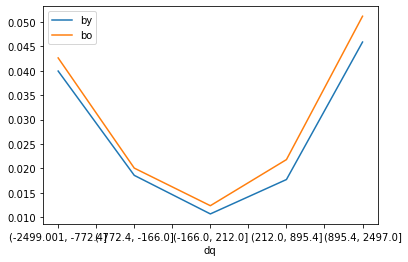

In [69]:
df38[['by','bo','dq']].dropna().groupby('dq').mean().plot()

In [75]:
df38.to_csv(str(l[0]))

In [99]:
pd.read_csv('1')

,Unnamed: 0,chr,b1,b2,by,bo,d_x,dq_x,d_y,dq_y,dq
0,2_289495,chr2,289495,289495,0.014663,0.039999,1199.0,"(1161.0, 1713.0]",1199.0,"(1161.0, 1713.0]","(895.4, 2497.0]"
1,17_44219420,chr17,44219420,44219420,0.000000,0.000000,-1543.0,"(-1711.0, -1126.0]",-1543.0,"(-1711.0, -1126.0]","(-2499.001, -772.4]"
2,16_86508563,chr16,86508563,86508563,NaN,NaN,-536.0,"(-689.0, -359.0]",-536.0,"(-689.0, -359.0]","(-772.4, -166.0]"
3,5_129904728,chr5,129904728,129904728,0.000000,0.010872,256.0,"(134.0, 407.0]",256.0,"(134.0, 407.0]","(212.0, 895.4]"
4,17_76240815,chr17,76240815,76240815,0.000000,0.000000,442.0,"(407.0, 739.0]",442.0,"(407.0, 739.0]","(212.0, 895.4]"
...,...,...,...,...,...,...,...,...,...,...,...
12609,3_129003990,chr3,129003990,129003990,0.082900,0.115606,2361.0,"(1713.0, 2499.0]",2361.0,"(1713.0, 2499.0]","(895.4, 2497.0]"
12610,19_33302626,chr19,33302626,33302626,0.000000,0.000000,62.0,"(-97.0, 134.0]",62.0,"(-97.0, 134.0]","(-166.0, 212.0]"
12611,6_99589205,chr6,99589205,99589205,0.003335,0.000000,1594.0,"(1161.0, 1713.0]",1594.0,"(1161.0, 1713.0]","(895.4, 2497.0]"
12612,10_26216735,chr10,26216735,26216735,NaN,NaN,428.0,"(407.0, 739.0]",428.0,"(407.0, 739.0]","(212.0, 895.4]"
